# Übung 1

## 1.1 Zentrale Lernprobleme im Machine Learning


<img src="https://data.bialonski.de/ml/exercise-1.png" style="border:1px solid black">

Sie finden unten eine Liste von Aufgaben und Daten.

* Im Falle von Aufgaben: In welche der drei auf der Folie genannten Lernproblemklassen (Supervised, Unsupervised, Reinforcement Learning) fallen diese Aufgaben? Bei Ihren Überlegungen kann es hilfreich sein, sich vorzustellen, welche Daten bei den Aufgaben vorliegen könnten. 

* Im Falle von Daten: In welche Lernproblemklasse könnten diese Daten fallen?

Mehrfachantworten können möglich sein. Begründen Sie ganz kurz Ihre Antwort (nur Stichworte; investieren Sie nicht zu viel Zeit). 

###### 1. Automatische Buchempfehlung für Kunden eines Onlinebuchhändlers.

###### 2. Vorhersage des Kreditlimits von Bankkunden.

###### 3. Spielen des Strategiespiels Tic-Tac-Toe.

###### 4. Eine Datenbank mit Songs (Audiodaten).

###### 5. Eine Datenbank mit Songs (Audiodaten) sowie Songtitel und Künstler.

1. Unsupervised learning, weil die Buchempfehlungen sich aus den gelesenen Büchern des Kunden zusammensetzen und es keinen Input vom Kunden gibt.
2. Supervised learning, man hat vergangene Datensätze aus denen sich das Ergebnis ableitet
3. Reinforcment, das Programm versucht selber sich an die perfekte Lösung anzunähern.
4. Unsupervised learning, der Algorithmus ordnet die Songs selber in Cluster ein
5. Supervised learning, die Songs werden anhand der Künstler/Songtitel eingeordnet

## 1.2. Perzeptron-Lern-Algorithmus (PLA)

Wir gehen in zwei Schritten vor:

1. Wir implementieren das Perzeptron als Funktion.
2. Wir implementieren den Perzeptron-Lern-Algorithmus (PLA).

### 1.2.1 Perzeptron
Sehen Sie sich noch einmal Folie 1-32ff an. Das Perzeptron $h(\mathbf{x})$ ist definiert wie folgt:

$$h(\mathbf{x}) = \text{sign}(\mathbf{w}^T\mathbf{x})$$

mit Gewichten $w_i$ sowie mit der Vorzeichenfunktion $\text{sign}(s)$, die das Vorzeichen (+1 oder -1) ihres Arguments ausgibt. Wir werden das Perzeptron in zwei Dimensionen ($d=2$) betrachten. Die Vektoren $\mathbf{w}$ und $\mathbf{x}$ habe ich Ihnen für diesen Fall noch einmal notiert:

$$\mathbf{w}\in\{(w_0, w_1, w_2)^T | w_0 \in\mathbb{R}, w_1 \in\mathbb{R}, w_2 \in\mathbb{R} \}$$

und

$$\mathbf{x}\in\{(x_0, x_1, x_2)^T | x_0 = 1, x_1 \in\mathbb{R}, x_2 \in\mathbb{R} \}$$

wobei $w_0$ die Rolle des Schwellwerts $b$ spielt. Wir hatten das Perzeptron im Kontext des Problems der Kreditgewährung kennengelernt, wo $\mathbf{x}$ die Features (Eigenschaften) des Bankkunden sind, $w_i$ die Gewichtung dieser Eigenschaften und $h(\mathbf{x})$ die finale Entscheidung über die Kreditvergabe. Die Aufgabe von PLA wird es sein, die Gewichte $w_i$ und den Schwellwert $b$ so zu verändern (bzw. zu "lernen"), dass die Entscheidungen ($h(\mathbf{x})$) über den Kredit mit denen übereinstimmen, die die Bankangestellten getroffen haben (um einmal im "Kreditvergabe"-Beispiel zu bleiben).

**Ihre Aufgaben:**

* Implementieren Sie das Perzeptron als Funktion mit dem Namen `h`, die einen Featurevektor $x$ und einen Gewichtsvektor $w$ entgegennimmt und $h(\mathbf{x})$ zurückgibt. Nutzen Sie die numpy Funktionen `dot` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)) und `sign` ([Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sign.html)).

In [269]:
import numpy as np

def h(x,w):
    return np.sign(w@x)

### 1.2.2 PLA Algorithmus

#### Der PLA Algorithmus

* **Daten:** $(\mathbf{x_i}, y_i)$ mit $i=1,\ldots,N$. 
* **Annahme:** Die Daten sind linear separierbar, d.h. wir können die Daten mithilfe einer Geraden ($d=2$) oder Hyperebene ($d>2$) in ihre Klassen aufteilen.

Sei $t=0,1,2,\ldots$ der aktuelle Iterationsschritt und sei $\mathbf{w}(t)$ der Vektor $\mathbf{w}$ zum Iterationsschritt $t$. Setze $t=0$ und $\mathbf{w}(0)=\mathbf{0}$.

1. Nutze das Perzeptron mit $\mathbf{w}(t)$ und klassifiziere alle Daten $\mathbf{x_i}, i=1,\ldots,N$.
2. Selektiere irgendein Paar $(\mathbf{x}_j, y_j)$, das falsch klassifiziert wurde, und nenne es $(\mathbf{x}(t), y(t))$. Wenn es kein solches Paar gibt, terminiere.
3. Aktualisiere das Gewicht $\mathbf{w}$ mit folgender Regel: $$\mathbf{w}(t+1) = \mathbf{w}(t)+y(t)\mathbf{x}(t)$$
4. Erhöhe $t$ um den Wert $1$ und kehre zu Schritt 1 zurück.

**Ihre Aufgaben**

(1) Lesen Sie sich den Algorithmus durch. In welchem Fall terminiert der Algorithmus? *In welchem Fall terminiert der Algorithmus nicht?*

Er terminiert, wenn die Daten linear separierbar sind, ansonsten terminiert der Algorithmus nicht. Also wenn alle Daten richtig klassifiziert worden sind.

(2) In der unteren Code-Zelle finden Sie einen synthetischen Datensatz, an den wir ein Perzeptron mithilfe von PLA trainieren wollen. Führen Sie den unten stehenden Code aus und betrachten die dadurch entstehende Abbildung. Die Funktionen im Bereich "Helper Functions" sind für Sie nicht weiter relevant. Sie dienen nur der Erzeugung des Datensatzes.

(0.0, 1.0, 0.0, 1.0)

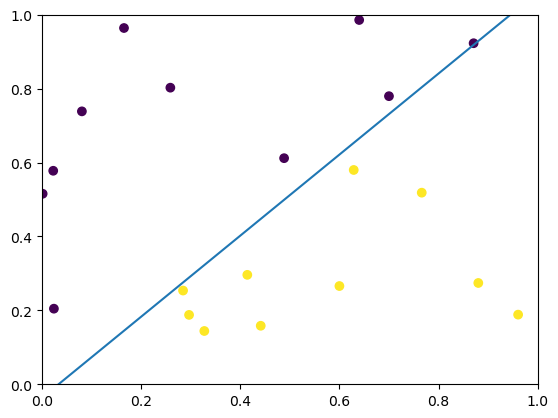

In [270]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt


# --------- START - Helper functions which are not important for you ---------

def generate_points(N):
    return np.random.rand(N, 2)


def generate_decision_line():
    g = generate_points(2)
    m = (g[1, 1] - g[1, 0]) / (g[0, 1] - g[0, 0])
    b = g[1, 0] - m * g[0, 0]

    def getY(x):
        return m * x + b

    func = getY
    return func


# This function creates an "unknown" target function f.
# f is then used to create labels y for points X.
# X is a matrix containing N rows (the data points) of
# with 2 dimensions (columns) each.
def getClassedPoints(N):
    np.random.seed(5)
    f = generate_decision_line()
    X = generate_points(N)
    y = np.array([1 if f(X[i, 0]) > X[i, 1] else -1
                  for i in range(X.shape[0])])
    return X, y, f


# --------- END - Helper functions which are not important for you ---------

# Obtain points X, labels y, and target function f.
# Note that in real world problems, we do not know f.
X, y, f = getClassedPoints(20)

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y)  # plots the data points
plt.plot(np.array([0, 1]), f(np.array([0, 1])))  # plots the target function
plt.axis((0, 1, 0, 1))  # ensures that we see the relevant part of the feature space

(3) Untersuchen Sie die Daten und beantworten Sie folgende Fragen: Wie viele Datenpunkte enthält der Datensatz? Wie viele Features besitzt jeder Datenpunkt?

In [271]:
print(X.shape) 

(20, 2)


Datensatz enthält 20 Datenpunkte und jeder Datenpunkt enthält 2 Features

(4) Nehmen Sie sich die Folien der heutigen Vorlesung zur Hand. Klären Sie für sich die Frage: Wie viele Einträge besitzt der Gewichtsvektor?

Der Gewichtsvektor enthält insgesamt 3 Einträge: zwei für die Features und einen für die Grenze oder b

(5) Implementieren Sie nun den Perzeptron-Lernalgorithmus (PLA) als Funktion mit dem Namen `pla`, die die Feature-Datenmatrix X (Nx2 Matrix), den Labelvektor $\mathbf{y}$ sowie Gewichte $\mathbf{w}(t)$ entgegennimmt und die finalen Gewichte $\mathbf{w}_\text{final}$ zurückgibt.

*Hinweise:*
* Die Funktion "pla" sollte sich selber rekursiv aufrufen, sofern ein Datenpunkt gefunden wurde, der durch das Perzeptron mit den aktuellen Gewichten $\mathbf{w}(t)$ nicht korrekt klassifiziert wird.
* Der Schwellwert ist im Gewichtsvektor $\mathbf{w}$ als 0-te Komponente enthalten ($w_0$). Der korrespondierende Datenwert $x_0$ ist aber in den Featurevektoren nicht enthalten. Schreiben Sie Ihre Funktion "pla" so, dass sie dort jeden untersuchten Featurevektor um die 0-te Komponente erweitern, bevor Sie ihn Ihrer Funktion "h" übergeben. Sie können [`np.column_stack`](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack) dafür verwenden.

In [272]:
def pla(X, y, w):
    x = np.column_stack((np.ones((X.shape[0],1)),X))
    
    for i in range(X.shape[0]):
        if y[i] != h(x[i], w):
            w = w + y[i] * x[i]
            return pla(X, y, w)
        
    return w

(6) Implementieren Sie eine Funktion `p`, die Ihnen die Entscheidungsgerade berechnet, die durch die von Ihrem Perzeptron gelernten Gewichte definiert wird. Die Funktion `p` nimmt einen beliebigen Wert $x$ sowie den finalen Gewichtsvektor $\mathbf{w}_\text{final}$ entgegen und gibt die Funktion $p(x)$ der Entscheidungsgeraden zurück (mit dem $x$ in $p(x)$ sind **keine** Featurevektoren gemeint, sondern die x-Koordinaten in einem Plot). Schlagen Sie in der Vorlesung nach, um zu sehen, wie Sie `p` implementieren können.

In [273]:
def p(w):
    def p(x):
        return - (w[0]/w[2]) - x * (w[1]/w[2])
    return p

(7) Wenden Sie den Ihren implementierten PLA Algorithmus auf die Daten $X$ und $y$ aus Schritt (2) an, die initialen Werte für $w$ können Sie dabei frei wählen. Visualisieren Sie dann die Daten $X$ sowie die Target Function $f$ und die vom Perzeptron gefundene Entscheidungsgerade $p$ in einem [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).

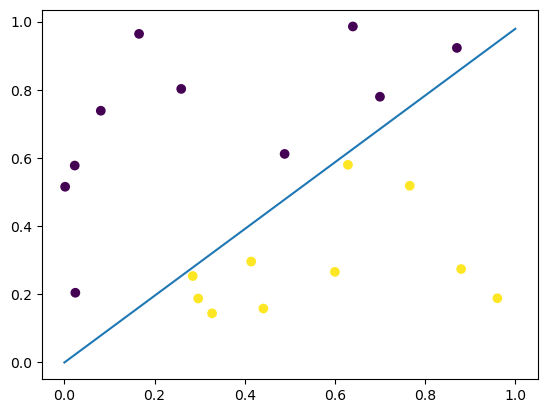

In [274]:
w = np.zeros(X.shape[1]+1)

w = pla(X, y, w)

plt.plot(np.array([0, 1]), p(w)(np.array([0, 1])))
plt.scatter(X[:, 0], X[:, 1], c=y)

## 1.3 \[Optional\] Schwertlilien 

* Diese Übung ist optional und wendet sich an diejenigen unter Ihnen, die in dieser Übungseinheit bereits die vorherigen Übungen abgeschlossen haben.

In dieser Übung lernen wir einen klassischen Datensatz kennen, den *Schwertlilien*-Datensatz (englisch: *Iris* dataset). Er wurde in der ersten Hälfte des 19. Jahrhunderts von Edgar Anderson, einem amerikanischen Botaniker, erhoben. Der Datensatz enthält Daten zu Kronblättern (petal) und Kelchblättern (sepal) *dreier Schwertlilienarten* (Iris species). Ein Foto dieser Eigenschaften finden Sie hier:

![Schwertlilien](https://data.bialonski.de/ml/schwertlilien.png)

Weiter unten habe ich Ihnen einen Befehl aus der Python Bibliothek *scikit-learn* aufgeschrieben, mit dessen Hilfe Sie den Iris-Datensatz importieren. Der Iris-Datensatz enthält Eigenschaften (*features*) dreier Schwertlilienarten sowie Informationen, zu welcher Schwertlilienart (*labels*) jeweils ein Satz von *features* gehört. Es handelt sich also um einen Datensatz, 

Lassen sich die drei Schwertlilienarten anhand der erfassten Features unterscheiden? Dies wollen wir uns einmal anschauen.

Wie bei jedem Machine Learning Projekt beginnen wir mit einer Untersuchung des Datensatzes. Untersuchen Sie den Datensatz, der sich im *data* Objekt befindet. Ermitteln Sie mit Code Antworten auf die folgenden Fragen:

**Ihre Aufgaben**

(1) Welche und wie viele Eigenschaften (*features*) enthält der Datensatz?

In [275]:
%matplotlib inline
# Wir importieren zunächst numpy und Teile der Matplotlib. Die werden Sie noch später brauchen.
import numpy as np
from matplotlib import pyplot as plt

# Und hier importieren wir den Schwertlilien-Datensatz.
from sklearn.datasets import load_iris
data = load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [276]:
print(data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


4 Features enthält der Datensatz:
'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

(2) Wie werden die drei Schwertlilienarten (*labels*) im Datensatz kodiert?

In [277]:
print(data['target_names'])

['setosa' 'versicolor' 'virginica']


(3) Wie viele Schwertlilien wurden vermessen? (Sie können z.B. die `.shape` Methode nutzen, um die Dimensionen von numpy-arrays zu ermitteln.)

In [278]:
print(data['data'].shape)

(150, 4)


Insgesamt 150 Schwertlilien wurden vermessen

(4) Gewinnen Sie einen ersten Eindruck über die Verteilung der einzelnen Features: 
  * Erzeugen Sie für jedes Feature jeweils ein Histogram über alle Schwertlilien hinweg. (Sie können den `hist` Befehl in der Matplotlib dafür verwenden ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html))).
  * Fallen Ihnen Unterschiede zwischen den Histogrammen auf?

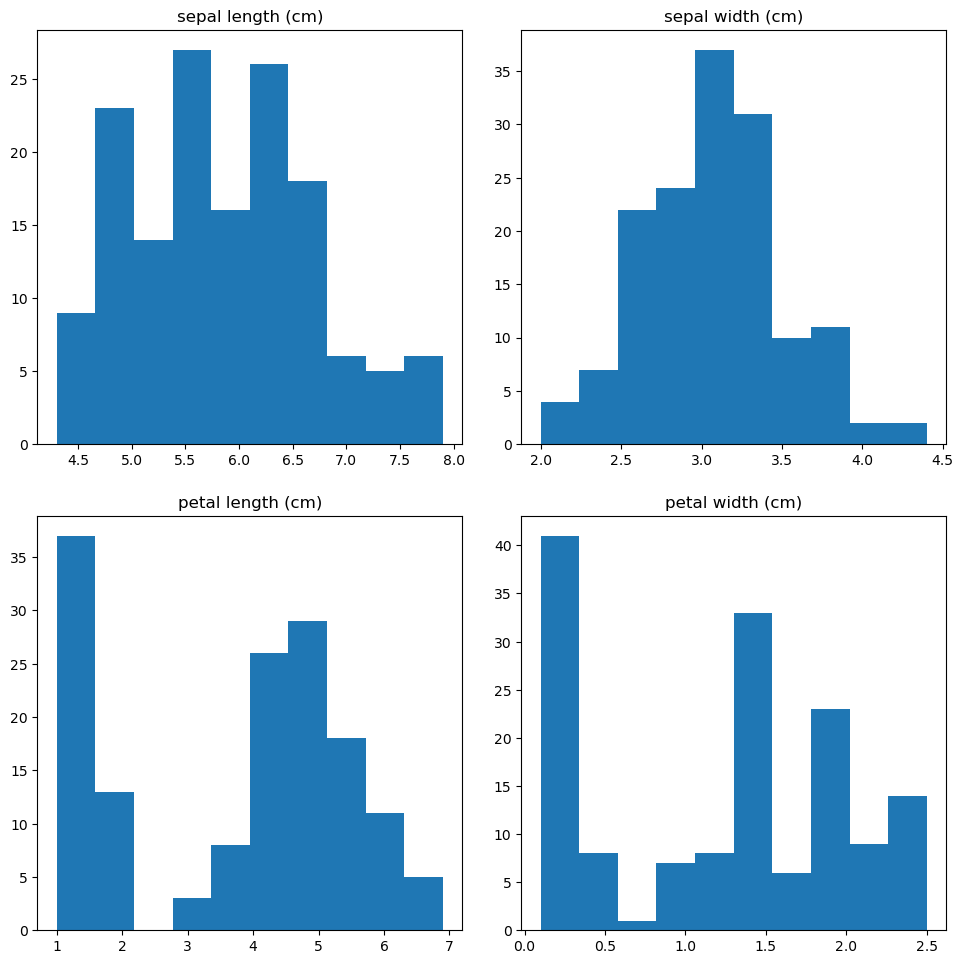

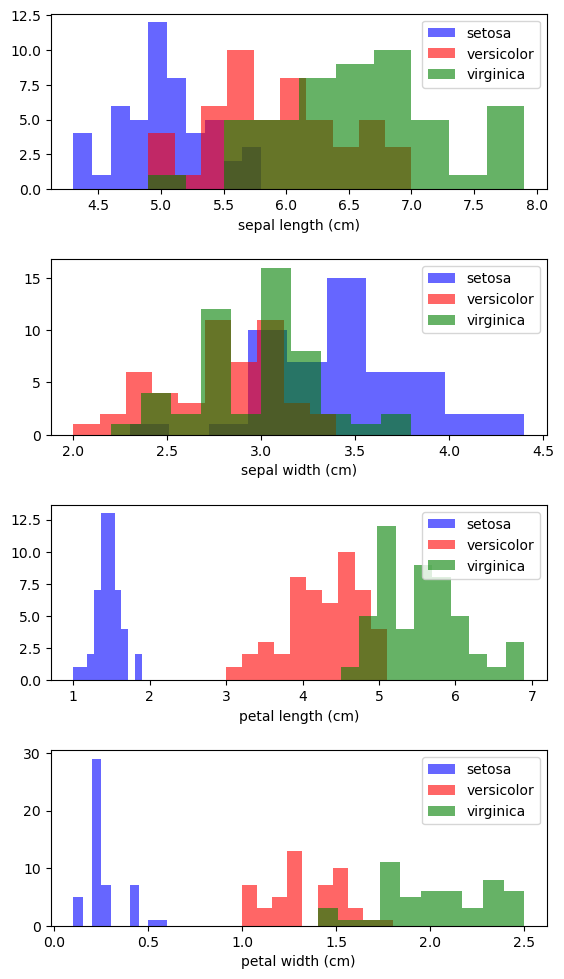

In [279]:
figure, axis = plt.subplots(2, 2, figsize=(10, 10)) 
axis[0, 0].hist(data.data[:, 0])
axis[0, 0].set_title("sepal length (cm)") 

axis[0, 1].hist(data.data[:, 1])
axis[0, 1].set_title("sepal width (cm)") 

axis[1, 0].hist(data.data[:, 2]) 
axis[1, 0].set_title("petal length (cm)")  

axis[1, 1].hist(data.data[:, 3])
axis[1, 1].set_title("petal width (cm)") 

figure.tight_layout(pad=2.0)
plt.show()

fig, axes = plt.subplots(nrows= 4, ncols=1)
colors= ['blue', 'red', 'green']

for i, ax in enumerate(axes.flat):
    for label, color in zip(range(len(data.target_names)), colors):
        ax.hist(data.data[data.target==label, i], label=
        data.target_names[label], color=color, alpha=0.6)
    ax.set_xlabel(data.feature_names[i])
    ax.legend(loc='upper right')

plt.subplots_adjust(bottom=0.1,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

(5) Wir haben bisher jedes Feature (Eigenschaft) einzeln betrachtet. Lassen Sie uns nun Paare von unterschiedlichen Features betrachten.
  * Wie viele solcher Featurepaare gibt es?
  * Erzeugen Sie für jedes dieser Featurepaare einen Scatterplot. Nutzen Sie dazu den `scatter` Befehl ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)).
  * Falls Sie dies noch nicht gemacht haben: Modifizieren Sie die Scatterplots so, dass die Farben der Punkte die Schwertlilienart kodiert (benutzen Sie dazu die Informationen "target" im Datensatz und verknüpfen diese mit dem `c=` Argument des scatter Befehls ([Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html))).
  * Gibt es in den Scatterplots auffällige Muster? Haben Sie eine Idee, ob und wie sich manche Schwertlilienarten von anderen unterscheiden lassen?

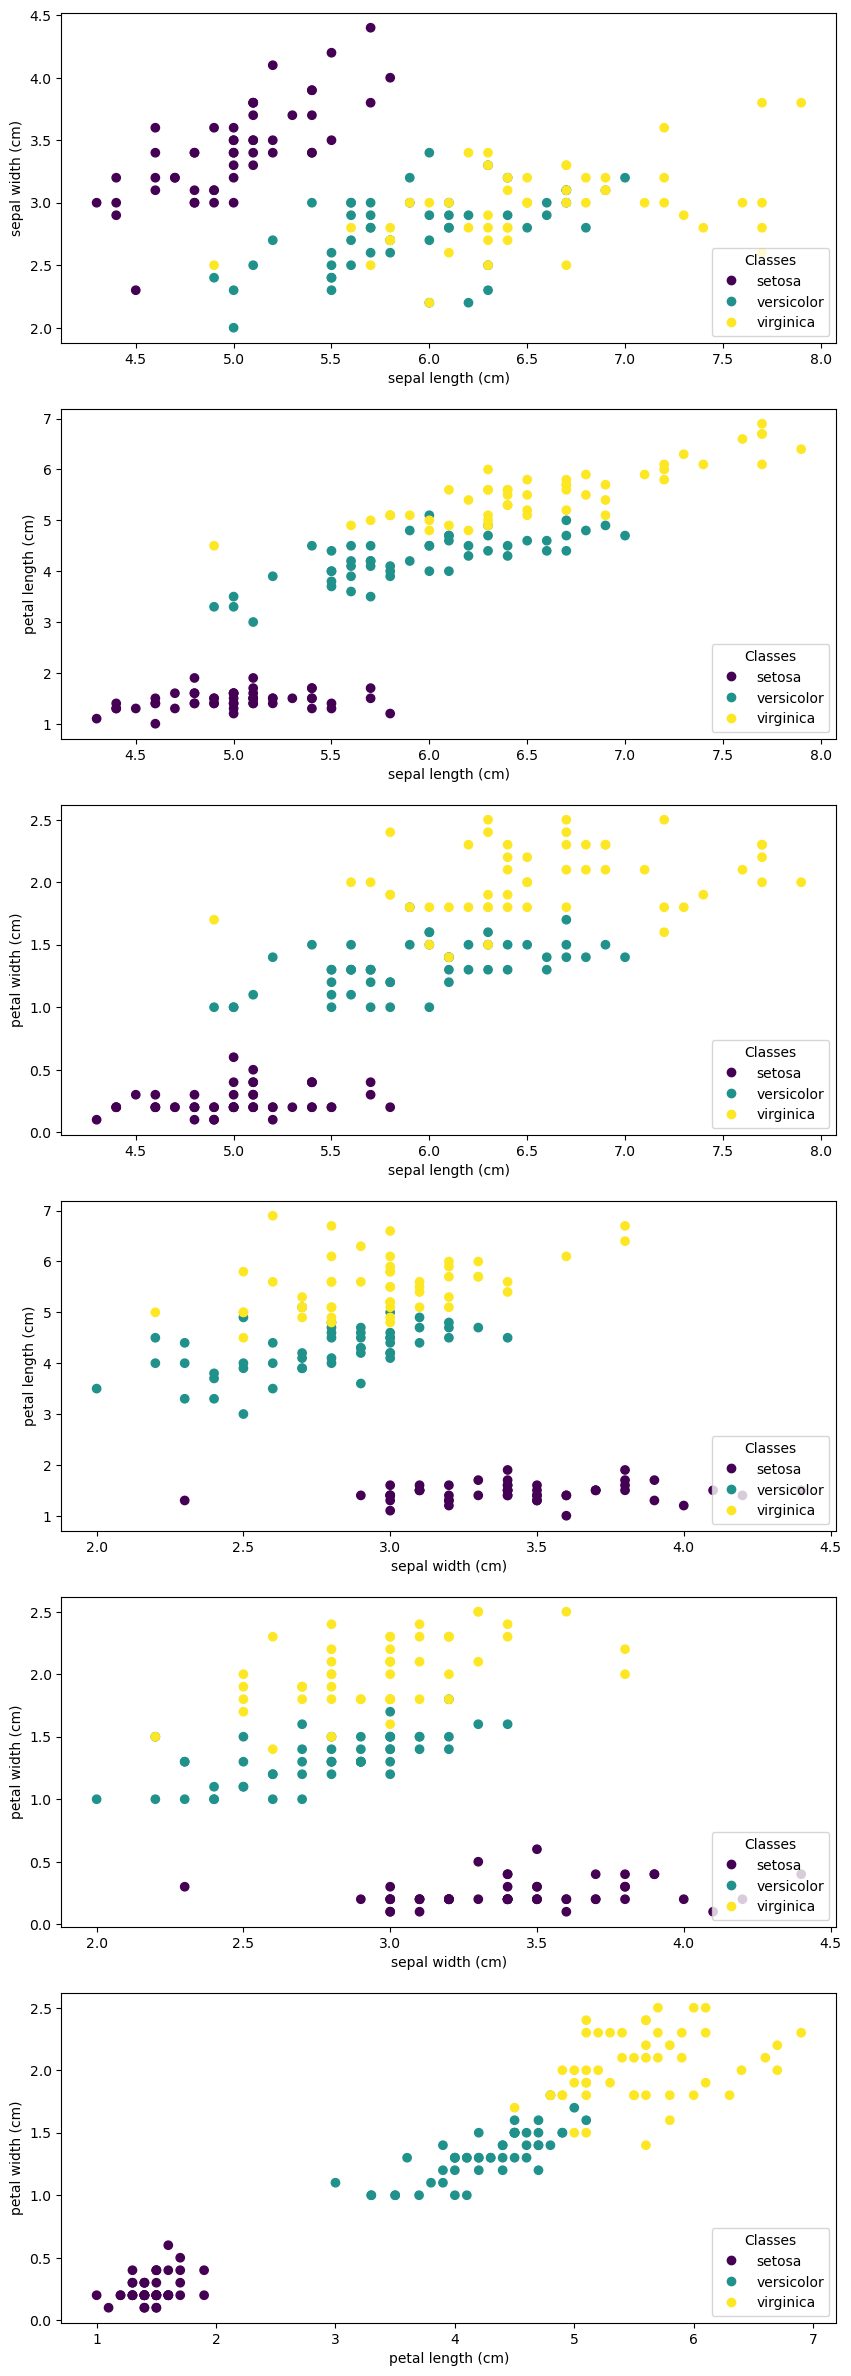

In [280]:
# Anzahl Paare: 6

fig, axes = plt.subplots(nrows = 6,figsize=(10,30))

paare = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]


for i in range(6):
    scatter = axes[i].scatter(data.data[:, paare[i][0]], data.data[:, paare[i][1]], c=data.target)
    axes[i].set(xlabel=data.feature_names[paare[i][0]], ylabel=data.feature_names[paare[i][1]])
    _ = axes[i].legend(
        scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes"
    )

plt.show()

(6) Wählen Sie ein Featurepaar aus, mit dem Sie eine Schwertlilienart von den anderen beiden Arten mit einer Gerade (Perzeptron) unterscheiden können. Nutzen Sie Ihren Code aus der vorherigen Aufgabe, um auf diesem Featurepaar ein Perzeptron zu trainieren. Visualisieren Sie die Featureebene mitsamt der Daten des Featurepaares, das Sie ausgewählt haben, sowie der gefundenen Gerade des Perzeptrons.

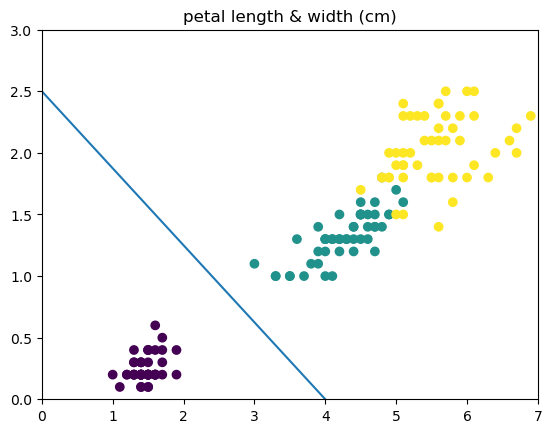

In [281]:
y = np.full(data.target.shape, 1)
for i in range(y.shape[0]):
    if data.target[i] != 0:
        y[i] = -1
        

iris = data['data'][:,[2,3]]

w = np.zeros(X.shape[1]+1)

w = pla(iris, y, w)

plt.plot(np.array([0, 7]), p(w)(np.array([0, 7])))
plt.scatter(iris[:,0], iris[:,1], c=data['target'])
plt.axis((0,7,0,3))
plt.title('petal length & width (cm)')
plt.show()

Damit darf ich Ihnen gratulieren. Sie haben das Perzeptron-Lernmodell genutzt, um eine Schwertlilienart von den anderen beiden automatisch anhand ihrer Features zu unterscheiden! :-)